In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def yadro(ggg):
    if ggg:
        return 0
    else:
        return 1


def K(ggg):
    if ggg >= -1.0 and ggg <= 1.0:
        return 0.75 * (1 - ggg ** 2)
    else:
        return 0


def regres(X, Y, Z):
    io = []
    for qr in range(len(Y)):
        A = 0
        B = 0
        for i in range(len(Y)):
            Limb = 1
            for i1 in range(len(Z)):
                Limb *= K((X[qr][i1] - X[i][i1]) / Z[i1])
            Limb *= yadro((not (X[qr][2]) and X[i][2]) or (X[qr][2]) and not (X[i][2]))
            A += Y[i] * Limb
            B += Limb
        io.append(A / B)
    return io


def funk(X, Y, Y1):
    fig, ax = plt.subplots()
    ax.plot(X, Y, color="black")
    ax.scatter(X, Y1, c='b')
    plt.show()


def funk3(X, Y, Y1, G):
    fig, ax = plt.subplots()
    ax.plot(X, Y, color="black")
    ax.scatter(X, Y1, c='b')
    ax.plot(X, G, c='y')
    plt.show()


def funk1(X, x3, Y, Y1):
    fig, ax = plt.subplots()
    M = []
    M1 = []
    for i in range(len(X)):
        if x3[i]:
            ax.scatter(X[i], Y1[i], c='r')
            M.append(X[i])
            M1.append(Y[i])
    ax.plot(M, M1, color="black")
    plt.show()


def funk4(X, x3, Y, G, Y1):
    fig, ax = plt.subplots()
    M = []
    M1 = []
    A1 = []
    for i in range(len(X)):
        if x3[i]:
            ax.scatter(X[i], Y1[i], c='r')
            A1.append(G[i])
            M.append(X[i])
            M1.append(Y[i])
    ax.plot(M, M1, color="black")
    ax.plot(M, A1, c="y")
    plt.show()


def funk2(X, x3, Y, Y1):
    fig, ax = plt.subplots()
    M = []
    M1 = []
    for i in range(len(X)):
        if not (x3[i]):
            ax.scatter(X[i], Y1[i], c='g')
            M.append(X[i])
            M1.append(Y[i])
    ax.plot(M, M1, color="black")
    plt.show()


def funk5(X, x3, Y, G, Y1):
    fig, ax = plt.subplots()
    M = []
    M1 = []
    A1 = []
    for i in range(len(X)):
        if not (x3[i]):
            ax.scatter(X[i], Y1[i], c='g')
            A1.append(G[i])
            M.append(X[i])
            M1.append(Y[i])
    ax.plot(M, M1, color="black")
    ax.plot(M, A1, c="y")
    plt.show()


a1 = -3
b1 = 7
a2 = 8
b2 = 18
N = 50 * 4
x1 = np.random.uniform(a1, b1, N)
x2 = np.random.uniform(a2, b2, N)
x1 = np.sort(x1)
x2 = np.sort(x2)
Err1 = np.random.normal(0, 10, N)
Err2 = np.random.normal(0, 15, N)
x3 = np.random.rand(N) < 0.5
X = []
for i in range(len(x3)):
    X.append([x1[i], x2[i], x3[i]])
Y1_True = []
Y2_True = []
for i in range(len(x3)):
    Y1_True.append(x1[i] - x2[i] ** 2 + x1[i] ** 3)
    Y2_True.append(x2[i] + x1[i] ** 2 - x1[i])
Y1 = []
Y2 = []
for i in range(len(x3)):
    Y1.append(Y1_True[i] + Err1[i])
    Y2.append(Y2_True[i] + Err2[i])

ПРЕДСТАВЛЕНИЕ Y1

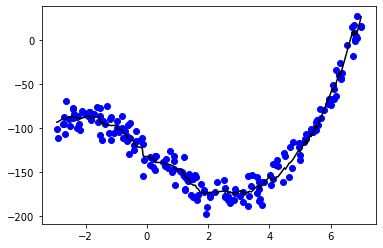

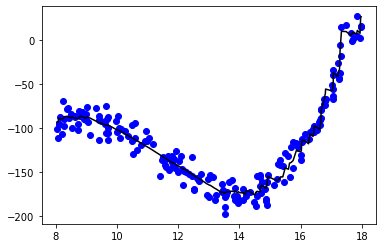

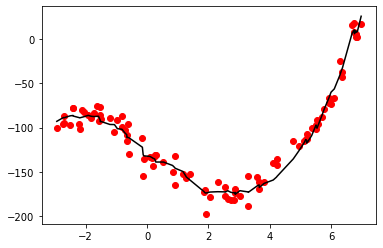

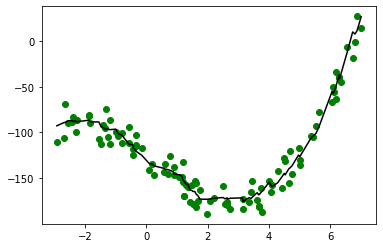

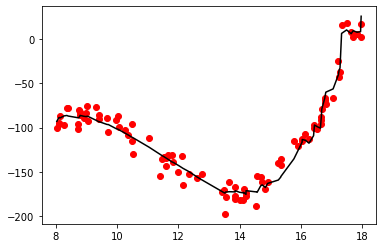

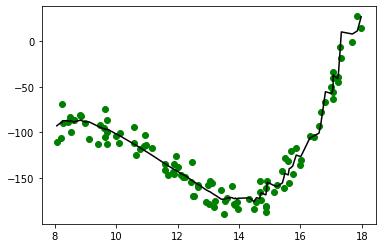

In [14]:
funk(x1, Y1_True, Y1)
funk(x2, Y1_True, Y1)
funk1(x1, x3, Y1_True, Y1)
funk2(x1, x3, Y1_True, Y1)
funk1(x2, x3, Y1_True, Y1)
funk2(x2, x3, Y1_True, Y1)

# ПРЕДСТАВЛЕНИЕ Y2

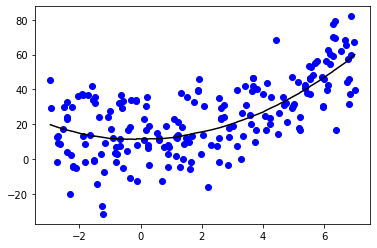

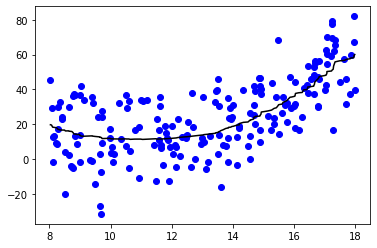

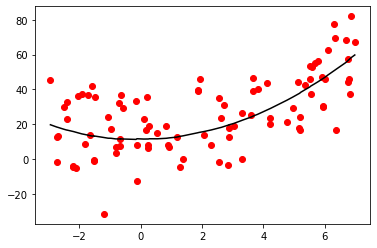

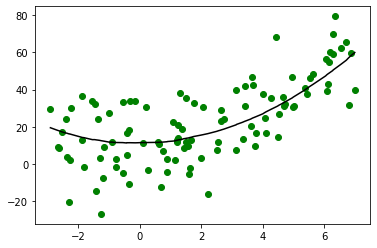

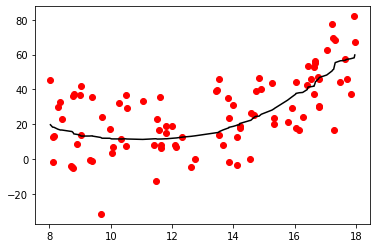

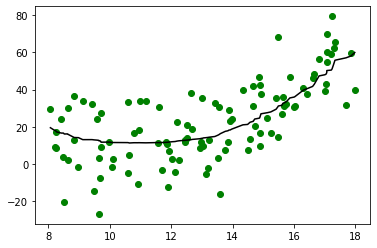

In [15]:
funk(x1, Y2_True, Y2)
funk(x2, Y2_True, Y2)
funk1(x1, x3, Y2_True, Y2)
funk2(x1, x3, Y2_True, Y2)
funk1(x2, x3, Y2_True, Y2)
funk2(x2, x3, Y2_True, Y2)

# РЕГРЕССИЯ Y1

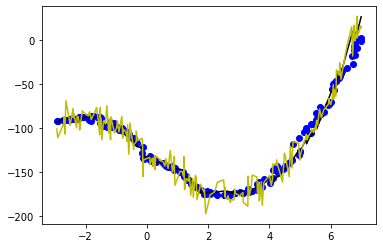

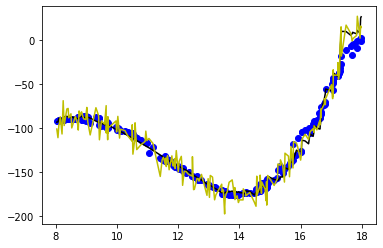

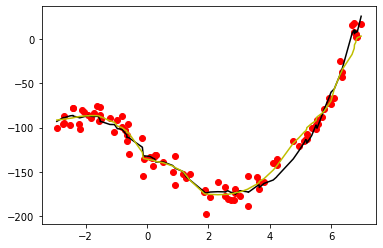

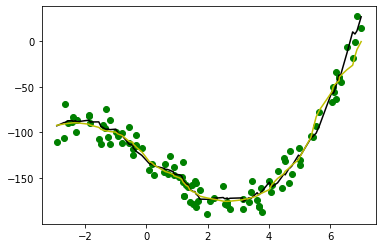

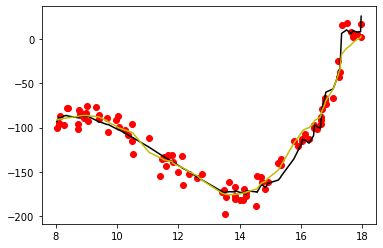

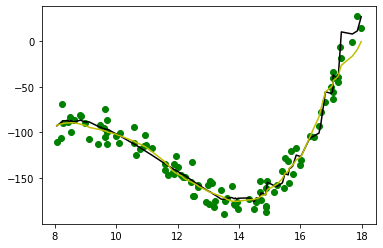

In [16]:
GY1 = regres(X, Y1, [1, 1])
funk3(x1, Y1_True, GY1, Y1)
funk3(x2, Y1_True, GY1, Y1)
funk4(x1, x3, Y1_True, GY1, Y1)
funk5(x1, x3, Y1_True, GY1, Y1)
funk4(x2, x3, Y1_True, GY1, Y1)
funk5(x2, x3, Y1_True, GY1, Y1)

РЕГРЕССИЯ Y2

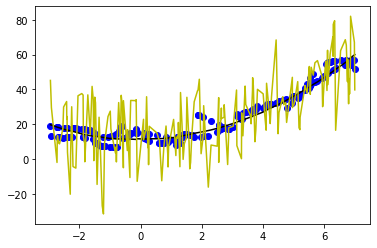

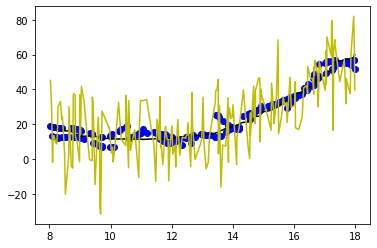

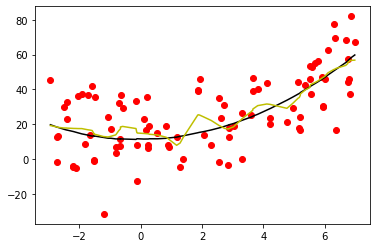

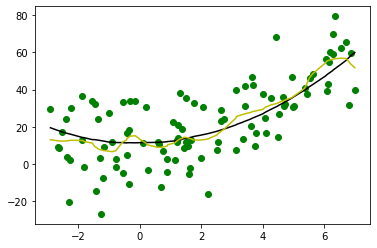

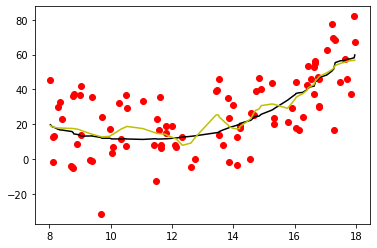

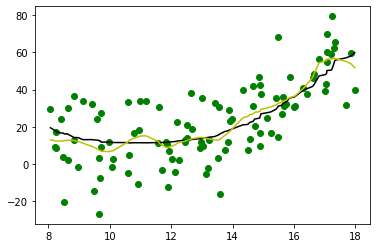

In [17]:
GY2 = regres(X, Y2, [1, 1])
funk3(x1, Y2_True, GY2, Y2)
funk3(x2, Y2_True, GY2, Y2)
funk4(x1, x3, Y2_True, GY2, Y2)
funk5(x1, x3, Y2_True, GY2, Y2)
funk4(x2, x3, Y2_True, GY2, Y2)
funk5(x2, x3, Y2_True, GY2, Y2)

оптимизация Y1

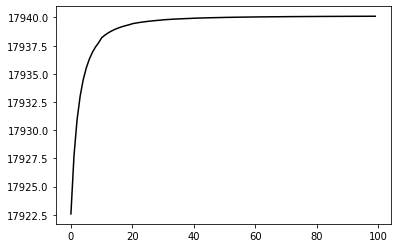

In [18]:
Dux1 = []
Dux2 = []
for i in range(len(X) - 1):
    Dux1.append((abs(X[i][0] - X[i + 1][0])))
    Dux2.append((abs(X[i][0] - X[i + 1][0])))
Dux1 = 10 * np.array((Dux1))
Dux2 = 10 * np.array((Dux1))
Dux1 = np.mean(Dux1)
Dux2 = np.mean(Dux2)
h1 = abs(10 - Dux1) / 10
h2 = abs(10 - Dux2) / 10
Cx1y1 = Dux1
Cx2y1 = Dux2
Cx1y2 = Dux1
Cx2y2 = Dux2
Bi1 = []
for i in range(10):
    Cx1y1 = Dux1
    for i1 in range(10):
        GY1 = regres(X, Y1, [Cx1y1, Cx2y1])
        Hjk = 0
        for i in range(len(X)):
            Hjk += (Y1[i] - GY1[i]) ** 2
        Bi1.append((Hjk))
        Cx2y1 += h1
    Cx2y1 += h2
fig, ax = plt.subplots()
ax.plot(range(len(Bi1)), Bi1, color='black')
plt.show()
Bi1 = np.array(Bi1)
Bi1 = np.argmin(Bi1)
Cx1y1 = Dux1 + h1 * (Bi1 % 10)
Cx2y1 = Dux2 + h2 * (Bi1 // 10)
GY1 = regres(X, Y1, [Cx1y1, Cx2y1])



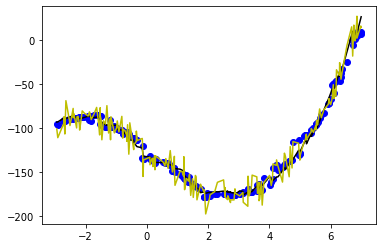

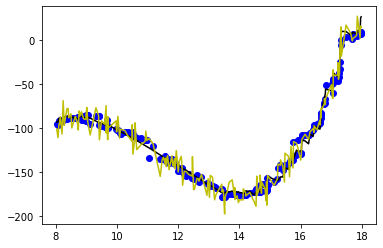

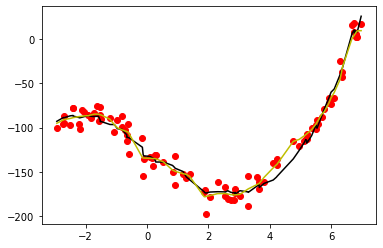

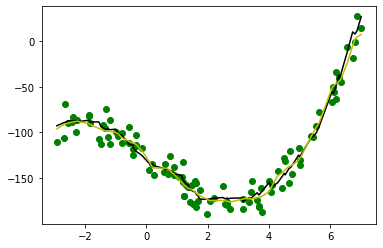

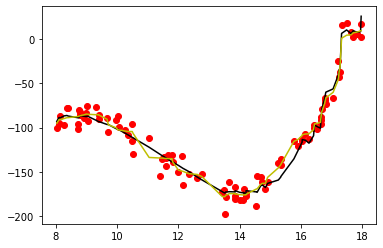

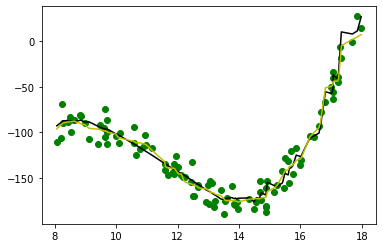

0.499665699815216 0.499665699815216 0


In [19]:
funk3(x1, Y1_True, GY1, Y1)
funk3(x2, Y1_True, GY1, Y1)
funk4(x1, x3, Y1_True, GY1, Y1)
funk5(x1, x3, Y1_True, GY1, Y1)
funk4(x2, x3, Y1_True, GY1, Y1)
funk5(x2, x3, Y1_True, GY1, Y1)
print(Cx1y1, Cx1y2, Bi1)

ОПТИМИЗАЦИЯ Y2

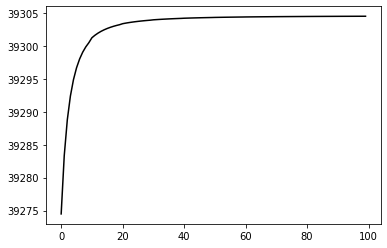

In [20]:
Bi1 = []
for i in range(10):
    Cx1y2 = Dux1
    for i1 in range(10):
        GY1 = regres(X, Y2, [Cx1y2, Cx2y2])
        Hjk = 0
        for i in range(len(X)):
            Hjk += (Y2[i] - GY1[i]) ** 2
        Bi1.append((Hjk))
        Cx2y2 += h1
    Cx2y2 += h2
fig, ax = plt.subplots()
ax.plot(range(len(Bi1)), Bi1, color='black')
plt.show()
Bi1 = np.array(Bi1)
Bi1 = np.argmin(Bi1)
Cx1y2 = Dux1 + h1 * (Bi1 % 10)
Cx2y2 = Dux2 + h2 * (Bi1 // 10)
GY2 = regres(X, Y2, [Cx1y2, Cx2y2])

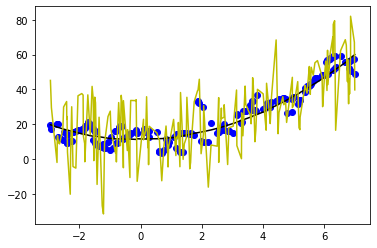

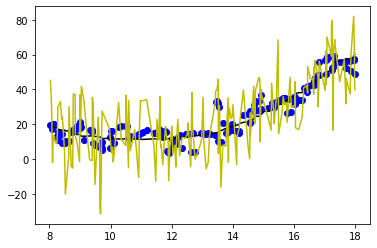

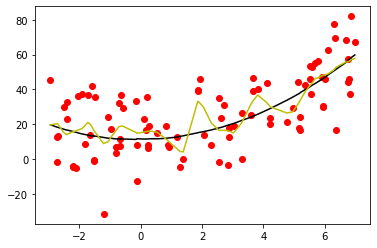

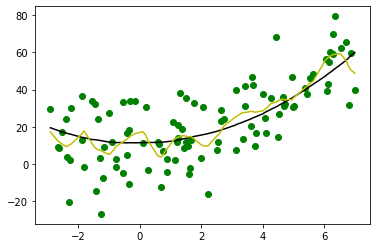

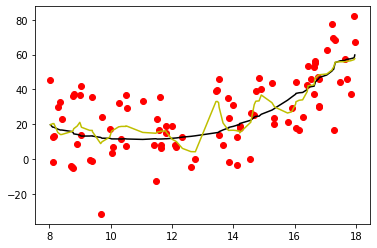

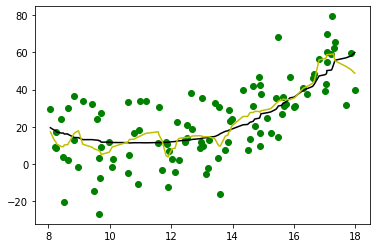

0.499665699815216 4.99665699815216 0


In [21]:
funk3(x1, Y2_True, GY2, Y2)
funk3(x2, Y2_True, GY2, Y2)
funk4(x1, x3, Y2_True, GY2, Y2)
funk5(x1, x3, Y2_True, GY2, Y2)
funk4(x2, x3, Y2_True, GY2, Y2)
funk5(x2, x3, Y2_True, GY2, Y2)
print(Cx1y2, Cx2y2, Bi1)

МАЛЕНЬКАЯ ВЫБОРКА

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def yadro(ggg):
    if ggg:
        return 0;
    else:
        return 1;


def K(ggg):
    if ggg >= -1.0 and ggg <= 1.0:
        return 0.75 * (1 - ggg ** 2)
    else:
        return 0;


def regres(X, Y, Z):
    io = []
    for qr in range(len(Y)):
        A = 0
        B = 0
        for i in range(len(Y)):
            Limb = 1
            for i1 in range(len(Z)):
                Limb *= K((X[qr][i1] - X[i][i1]) / Z[i1])
            Limb *= yadro((not (X[qr][2]) and X[i][2]) or (X[qr][2]) and not (X[i][2]))
            A += Y[i] * Limb
            B += Limb
        io.append(A / B)
    return io;


def funk(X, Y, Y1):
    fig, ax = plt.subplots()
    ax.plot(X, Y, color="black")
    ax.scatter(X, Y1, c='b')
    plt.show()


def funk3(X, Y, Y1, G):
    fig, ax = plt.subplots()
    ax.plot(X, Y, color="black")
    ax.scatter(X, Y1, c='b')
    ax.plot(X, G, c='y')
    plt.show()


def funk1(X, x3, Y, Y1):
    fig, ax = plt.subplots()
    M = []
    M1 = []
    for i in range(len(X)):
        if x3[i]:
            ax.scatter(X[i], Y1[i], c='r')
            M.append(X[i])
            M1.append(Y[i])
    ax.plot(M, M1, color="black")
    plt.show()


def funk4(X, x3, Y, G, Y1):
    fig, ax = plt.subplots()
    M = []
    M1 = []
    A1 = []
    for i in range(len(X)):
        if x3[i]:
            ax.scatter(X[i], Y1[i], c='r')
            A1.append(G[i])
            M.append(X[i])
            M1.append(Y[i])
    ax.plot(M, M1, color="black")
    ax.plot(M, A1, c="y")
    plt.show()


def funk2(X, x3, Y, Y1):
    fig, ax = plt.subplots()
    M = []
    M1 = []
    for i in range(len(X)):
        if not (x3[i]):
            ax.scatter(X[i], Y1[i], c='g')
            M.append(X[i])
            M1.append(Y[i])
    ax.plot(M, M1, color="black")
    plt.show()


def funk5(X, x3, Y, G, Y1):
    fig, ax = plt.subplots()
    M = []
    M1 = []
    A1 = []
    for i in range(len(X)):
        if not (x3[i]):
            ax.scatter(X[i], Y1[i], c='g')
            A1.append(G[i])
            M.append(X[i])
            M1.append(Y[i])
    ax.plot(M, M1, color="black")
    ax.plot(M, A1, c="y")
    plt.show()


In [23]:
a1 = -3
b1 = 7
a2 = 8
b2 = 18
N = 50
x1 = np.random.uniform(a1, b1, N)
x2 = np.random.uniform(a2, b2, N)
x1 = np.sort(x1)
x2 = np.sort(x2)
Err1 = np.random.normal(0, 10, N)
Err2 = np.random.normal(0, 15, N)
x3 = np.random.rand(N) < 0.5
X = []
for i in range(len(x3)):
    X.append([x1[i], x2[i], x3[i]])
Y1_True = []
Y2_True = []
for i in range(len(x3)):
    Y1_True.append(x1[i] - x2[i] ** 2 + x1[i] ** 3)
    Y2_True.append(x2[i] + x1[i] ** 2 - x1[i])
Y1 = []
Y2 = []
for i in range(len(x3)):
    Y1.append(Y1_True[i] + Err1[i])
    Y2.append(Y2_True[i] + Err2[i])


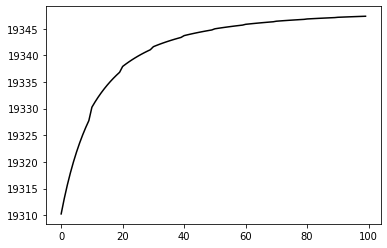

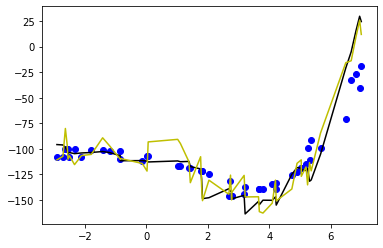

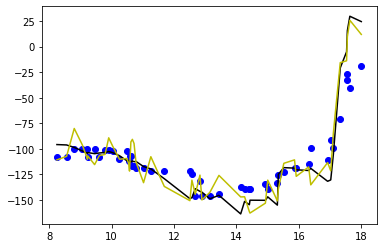

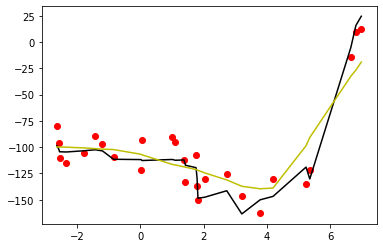

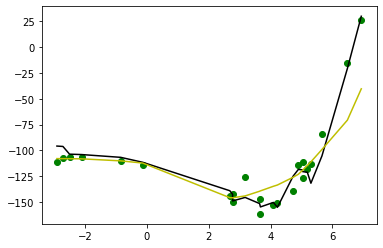

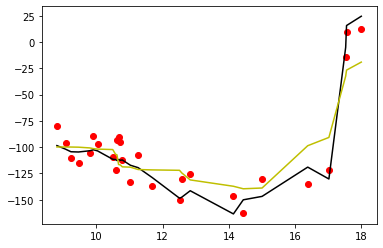

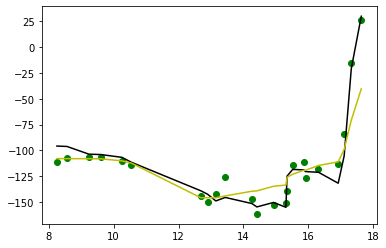

2.0210082108371004 20.210082108371004 0


In [24]:
Dux1 = []
Dux2 = []
for i in range(len(X) - 1):
    Dux1.append((abs(X[i][0] - X[i + 1][0])))
    Dux2.append((abs(X[i][0] - X[i + 1][0])))
Dux1 = 10 * np.array((Dux1))
Dux2 = 10 * np.array((Dux1))
Dux1 = np.mean(Dux1)
Dux2 = np.mean(Dux2)
h1 = abs(10 - Dux1) / 10
h2 = abs(10 - Dux2) / 10
Cx1y1 = Dux1
Cx2y1 = Dux2
Cx1y2 = Dux1
Cx2y2 = Dux2
Bi1 = []
for i in range(10):
    Cx1y1 = Dux1
    for i1 in range(10):
        GY1 = regres(X, Y1, [Cx1y1, Cx2y1])
        Hjk = 0
        for i in range(len(X)):
            Hjk += (Y1[i] - GY1[i]) ** 2
        Bi1.append((Hjk))
        Cx2y1 += h1
    Cx2y1 += h2
fig, ax = plt.subplots()
ax.plot(range(len(Bi1)), Bi1, color='black')
plt.show()
Bi1 = np.array(Bi1)
Bi1 = np.argmin(Bi1)
Cx1y1 = Dux1 + h1 * (Bi1 % 10)
Cx2y1 = Dux2 + h2 * (Bi1 // 10)
GY1 = regres(X, Y1, [Cx1y1, Cx2y1])
funk3(x1, Y1_True, GY1, Y1)
funk3(x2, Y1_True, GY1, Y1)
funk4(x1, x3, Y1_True, GY1, Y1)
funk5(x1, x3, Y1_True, GY1, Y1)
funk4(x2, x3, Y1_True, GY1, Y1)
funk5(x2, x3, Y1_True, GY1, Y1)
print(Cx1y1, Cx2y1, Bi1)

Большая выборка

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def yadro(ggg):
    if ggg:
        return 0;
    else:
        return 1;


def K(ggg):
    if ggg >= -1.0 and ggg <= 1.0:
        return 0.75 * (1 - ggg ** 2)
    else:
        return 0;


def regres(X, Y, Z):
    io = []
    for qr in range(len(Y)):
        A = 0
        B = 0
        for i in range(len(Y)):
            Limb = 1
            for i1 in range(len(Z)):
                Limb *= K((X[qr][i1] - X[i][i1]) / Z[i1])
            Limb *= yadro((not (X[qr][2]) and X[i][2]) or (X[qr][2]) and not (X[i][2]))
            A += Y[i] * Limb
            B += Limb
        io.append(A / B)
    return io;


def funk(X, Y, Y1):
    fig, ax = plt.subplots()
    ax.plot(X, Y, color="black")
    ax.scatter(X, Y1, c='b')
    plt.show()


def funk3(X, Y, Y1, G):
    fig, ax = plt.subplots()
    ax.plot(X, Y, color="black")
    ax.scatter(X, Y1, c='b')
    ax.plot(X, G, c='y')
    plt.show()


def funk1(X, x3, Y, Y1):
    fig, ax = plt.subplots()
    M = []
    M1 = []
    for i in range(len(X)):
        if x3[i]:
            ax.scatter(X[i], Y1[i], c='r')
            M.append(X[i])
            M1.append(Y[i])
    ax.plot(M, M1, color="black")
    plt.show()


def funk4(X, x3, Y, G, Y1):
    fig, ax = plt.subplots()
    M = []
    M1 = []
    A1 = []
    for i in range(len(X)):
        if x3[i]:
            ax.scatter(X[i], Y1[i], c='r')
            A1.append(G[i])
            M.append(X[i])
            M1.append(Y[i])
    ax.plot(M, M1, color="black")
    ax.plot(M, A1, c="y")
    plt.show()


def funk2(X, x3, Y, Y1):
    fig, ax = plt.subplots()
    M = []
    M1 = []
    for i in range(len(X)):
        if not (x3[i]):
            ax.scatter(X[i], Y1[i], c='g')
            M.append(X[i])
            M1.append(Y[i])
    ax.plot(M, M1, color="black")
    plt.show()


def funk5(X, x3, Y, G, Y1):
    fig, ax = plt.subplots()
    M = []
    M1 = []
    A1 = []
    for i in range(len(X)):
        if not (x3[i]):
            ax.scatter(X[i], Y1[i], c='g')
            A1.append(G[i])
            M.append(X[i])
            M1.append(Y[i])
    ax.plot(M, M1, color="black")
    ax.plot(M, A1, c="y")
    plt.show()


a1 = -3
b1 = 7
a2 = 8
b2 = 18
N = 50 * 10
x1 = np.random.uniform(a1, b1, N)
x2 = np.random.uniform(a2, b2, N)
x1 = np.sort(x1)
x2 = np.sort(x2)
Err1 = np.random.normal(0, 10, N)
Err2 = np.random.normal(0, 15, N)
x3 = np.random.rand(N) < 0.5
X = []
for i in range(len(x3)):
    X.append([x1[i], x2[i], x3[i]])
Y1_True = []
Y2_True = []
for i in range(len(x3)):
    Y1_True.append(x1[i] - x2[i] ** 2 + x1[i] ** 3)
    Y2_True.append(x2[i] + x1[i] ** 2 - x1[i])
Y1 = []
Y2 = []
for i in range(len(x3)):
    Y1.append(Y1_True[i] + Err1[i])
    Y2.append(Y2_True[i] + Err2[i])


# Представление Y1

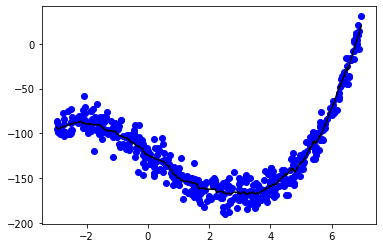

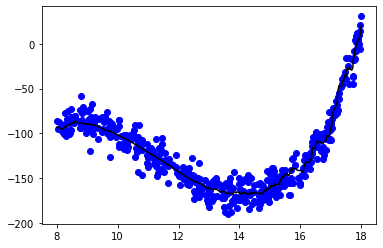

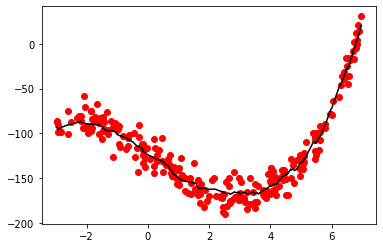

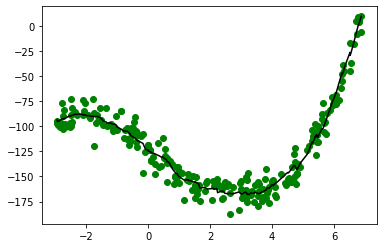

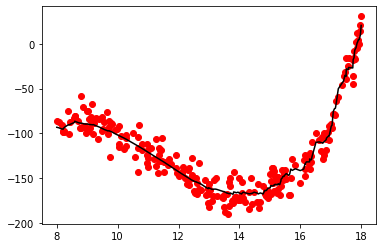

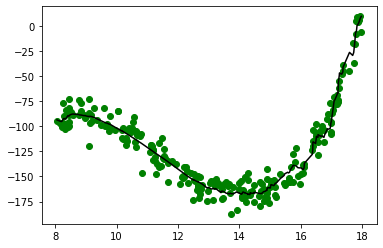

In [26]:
funk(x1, Y1_True, Y1)
funk(x2, Y1_True, Y1)
funk1(x1, x3, Y1_True, Y1)
funk2(x1, x3, Y1_True, Y1)
funk1(x2, x3, Y1_True, Y1)
funk2(x2, x3, Y1_True, Y1)


# ПРЕДСТАВЛЕНИЕ Y2

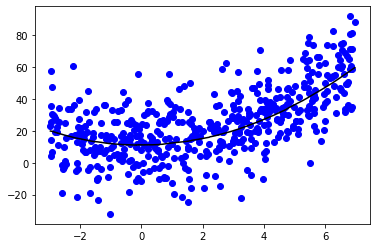

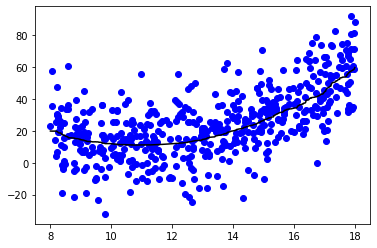

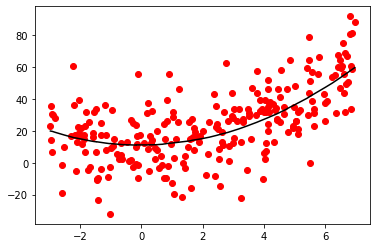

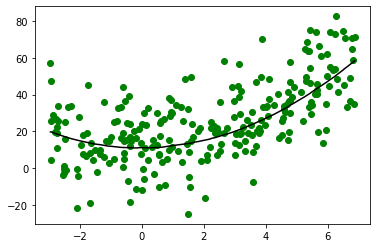

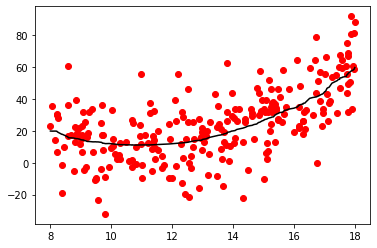

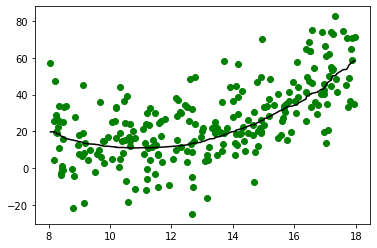

In [27]:
funk(x1, Y2_True, Y2)
funk(x2, Y2_True, Y2)
funk1(x1, x3, Y2_True, Y2)
funk2(x1, x3, Y2_True, Y2)
funk1(x2, x3, Y2_True, Y2)
funk2(x2, x3, Y2_True, Y2)

# Регрессия Y1


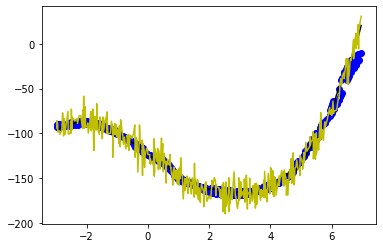

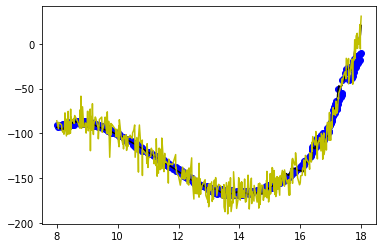

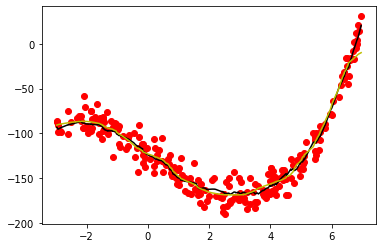

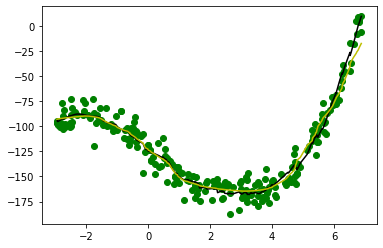

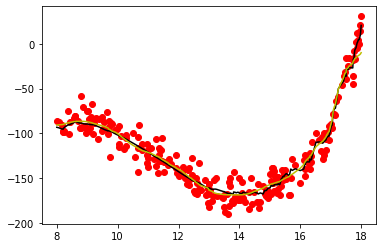

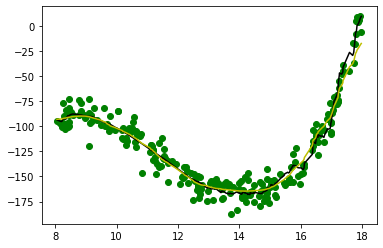

In [28]:
GY1 = regres(X, Y1, [1, 1])
funk3(x1, Y1_True, GY1, Y1)
funk3(x2, Y1_True, GY1, Y1)
funk4(x1, x3, Y1_True, GY1, Y1)
funk5(x1, x3, Y1_True, GY1, Y1)
funk4(x2, x3, Y1_True, GY1, Y1)
funk5(x2, x3, Y1_True, GY1, Y1)

# Регрессия Y2


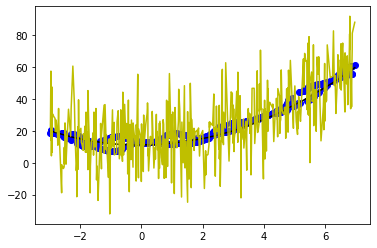

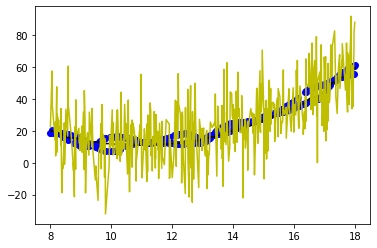

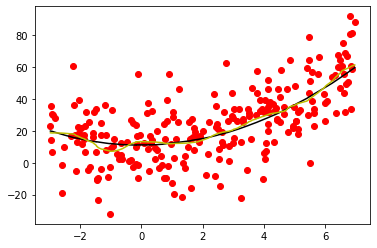

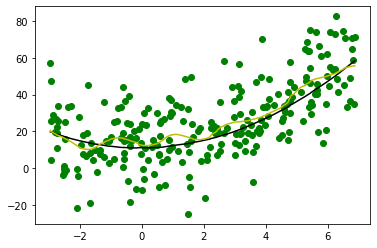

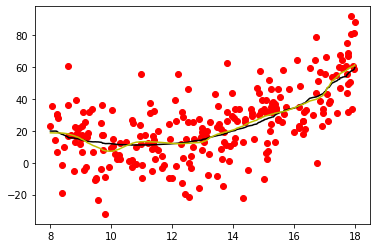

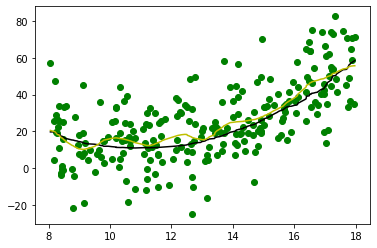

In [29]:
GY2 = regres(X, Y2, [1, 1])
funk3(x1, Y2_True, GY2, Y2)
funk3(x2, Y2_True, GY2, Y2)
funk4(x1, x3, Y2_True, GY2, Y2)
funk5(x1, x3, Y2_True, GY2, Y2)
funk4(x2, x3, Y2_True, GY2, Y2)
funk5(x2, x3, Y2_True, GY2, Y2)



# оптимизация Y1


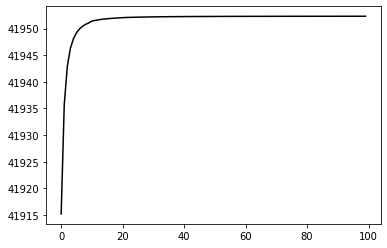

In [30]:
Dux1 = []
Dux2 = []
for i in range(len(X) - 1):
    Dux1.append((abs(X[i][0] - X[i + 1][0])))
    Dux2.append((abs(X[i][0] - X[i + 1][0])))
Dux1 = 10 * np.array((Dux1))
Dux2 = 10 * np.array((Dux1))
Dux1 = np.mean(Dux1)
Dux2 = np.mean(Dux2)
h1 = abs(10 - Dux1) / 10
h2 = abs(10 - Dux2) / 10
Cx1y1 = Dux1
Cx2y1 = Dux2
Cx1y2 = Dux1
Cx2y2 = Dux2
Bi1 = []
for i in range(10):
    Cx1y1 = Dux1
    for i1 in range(10):
        GY1 = regres(X, Y1, [Cx1y1, Cx2y1])
        Hjk = 0
        for i in range(len(X)):
            Hjk += (Y1[i] - GY1[i]) ** 2
        Bi1.append((Hjk))
        Cx2y1 += h1
    Cx2y1 += h2
fig, ax = plt.subplots()
ax.plot(range(len(Bi1)), Bi1, color='black')
plt.show()
Bi1 = np.array(Bi1)
Bi1 = np.argmin(Bi1)
Cx1y1 = Dux1 + h1 * (Bi1 % 10)
Cx2y1 = Dux2 + h2 * (Bi1 // 10)
GY1 = regres(X, Y1, [Cx1y1, Cx2y1])

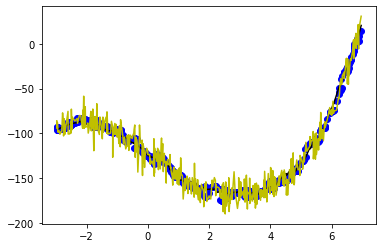

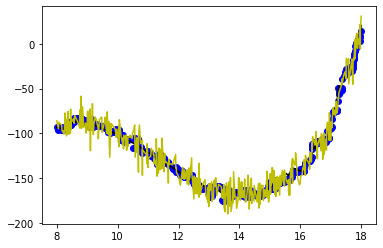

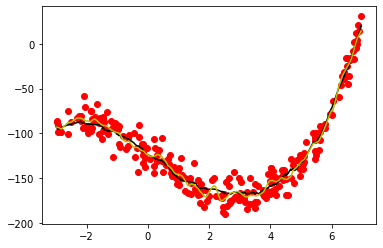

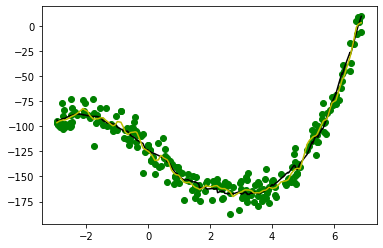

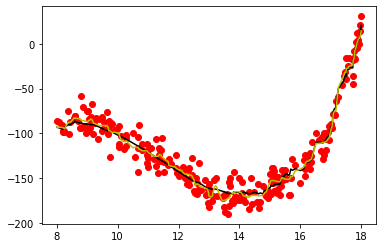

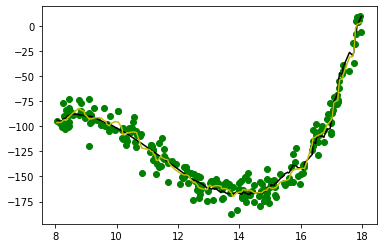

0.19906446915402645 0.19906446915402645 0


In [31]:
funk3(x1, Y1_True, GY1, Y1)
funk3(x2, Y1_True, GY1, Y1)
funk4(x1, x3, Y1_True, GY1, Y1)
funk5(x1, x3, Y1_True, GY1, Y1)
funk4(x2, x3, Y1_True, GY1, Y1)
funk5(x2, x3, Y1_True, GY1, Y1)
print(Cx1y1, Cx1y2, Bi1)


# оптимизация Y2

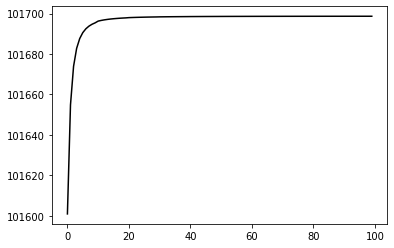

In [32]:
Bi1 = []
for i in range(10):
    Cx1y2 = Dux1
    for i1 in range(10):
        GY1 = regres(X, Y2, [Cx1y2, Cx2y2])
        Hjk = 0
        for i in range(len(X)):
            Hjk += (Y2[i] - GY1[i]) ** 2
        Bi1.append((Hjk))
        Cx2y2 += h1
    Cx2y2 += h2
fig, ax = plt.subplots()
ax.plot(range(len(Bi1)), Bi1, color='black')
plt.show()
Bi1 = np.array(Bi1)
Bi1 = np.argmin(Bi1)
Cx1y2 = Dux1 + h1 * (Bi1 % 10)
Cx2y2 = Dux2 + h2 * (Bi1 // 10)
GY2 = regres(X, Y2, [Cx1y2, Cx2y2])

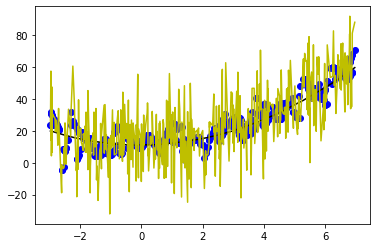

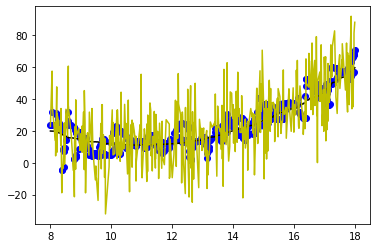

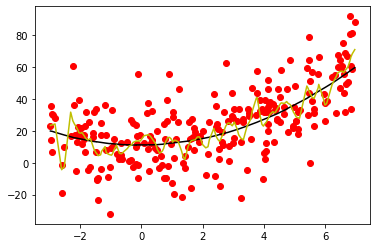

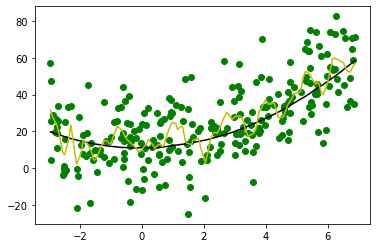

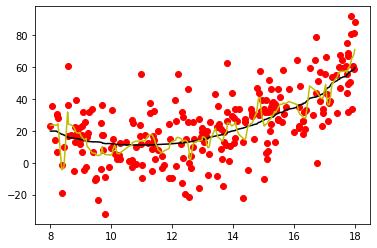

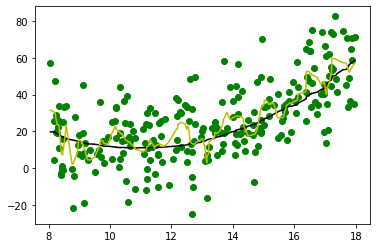

0.19906446915402645 1.990644691540265 0


In [33]:
funk3(x1, Y2_True, GY2, Y2)
funk3(x2, Y2_True, GY2, Y2)
funk4(x1, x3, Y2_True, GY2, Y2)
funk5(x1, x3, Y2_True, GY2, Y2)
funk4(x2, x3, Y2_True, GY2, Y2)
funk5(x2, x3, Y2_True, GY2, Y2)
print(Cx1y2, Cx2y2, Bi1)
